#Credit Card Fraud Detection

In [11]:
import pandas as pd

data = pd.read_csv("/content/creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [13]:
# Basic info & missing values
print("Shape:", data.shape)
print("\nInfo:\n")
print(data.info())

print("\nMissing values:\n")
print(data.isnull().sum())


Shape: (75357, 31)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75357 entries, 0 to 75356
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    75357 non-null  int64  
 1   V1      75357 non-null  float64
 2   V2      75357 non-null  float64
 3   V3      75357 non-null  float64
 4   V4      75357 non-null  float64
 5   V5      75357 non-null  float64
 6   V6      75357 non-null  float64
 7   V7      75357 non-null  float64
 8   V8      75357 non-null  float64
 9   V9      75357 non-null  float64
 10  V10     75357 non-null  float64
 11  V11     75357 non-null  float64
 12  V12     75357 non-null  float64
 13  V13     75357 non-null  float64
 14  V14     75357 non-null  float64
 15  V15     75357 non-null  float64
 16  V16     75357 non-null  float64
 17  V17     75357 non-null  float64
 18  V18     75357 non-null  float64
 19  V19     75357 non-null  float64
 20  V20     75357 non-null  float64
 21  V21     

Class distribution:
 Class
0.0    75173
1.0      183
Name: count, dtype: int64


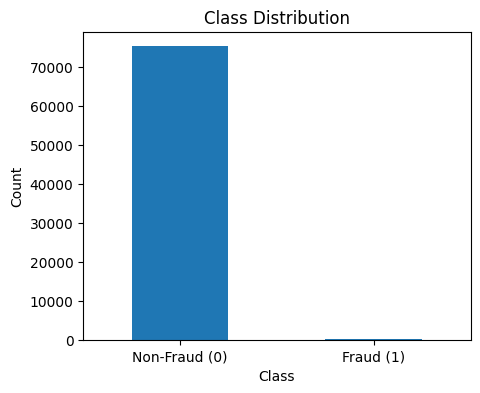

In [14]:
# Class distribution
class_counts = data['Class'].value_counts()
print("Class distribution:\n", class_counts)

plt.figure(figsize=(5,4))
class_counts.plot(kind='bar')
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [15]:
# Features and target
X = data.drop('Class', axis=1)
y = data['Class']

print("Features:", X.shape)
print("Target:", y.shape)


Features: (75357, 30)
Target: (75357,)


In [16]:
# Train-test split
# Handle NaN values in y before splitting
nan_indices = y[y.isna()].index
X_cleaned = X.drop(nan_indices)
y_cleaned = y.drop(nan_indices)

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (60284, 30) (60284,)
Test : (15072, 30) (15072,)


In [17]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# Model training
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Model trained ✅")


Model trained ✅


In [19]:
# Predictions + metrics
y_pred = log_reg.predict(X_test_scaled)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.9783
Precision: 0.0994
Recall   : 0.9730
F1-score : 0.1805

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15035
         1.0       0.10      0.97      0.18        37

    accuracy                           0.98     15072
   macro avg       0.55      0.98      0.58     15072
weighted avg       1.00      0.98      0.99     15072



In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[14709,   326],
       [    1,    36]])

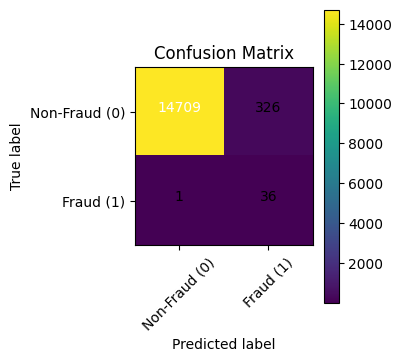

In [21]:
# Plot confusion matrix
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Fraud (0)', 'Fraud (1)'], rotation=45)
plt.yticks(tick_marks, ['Non-Fraud (0)', 'Fraud (1)'])

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [22]:
# Small conclusion
print("Conclusion:")
print(
    "A Logistic Regression model with class_weight='balanced' was trained to detect\n"
    "fraudulent transactions on the imbalanced credit card dataset. The evaluation\n"
    "metrics show how well the model identifies fraud cases while controlling false\n"
    "alarms."
)


Conclusion:
A Logistic Regression model with class_weight='balanced' was trained to detect
fraudulent transactions on the imbalanced credit card dataset. The evaluation
metrics show how well the model identifies fraud cases while controlling false
alarms.
